<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Perceptron</a></span><ul class="toc-item"><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Setosa-classification" data-toc-modified-id="Setosa-classification-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setosa classification</a></span></li><li><span><a href="#Separation-Versicolour-from-Virginica" data-toc-modified-id="Separation-Versicolour-from-Virginica-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Separation Versicolour from Virginica</a></span></li></ul></li><li><span><a href="#MLP" data-toc-modified-id="MLP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MLP</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#MLP-Implementation" data-toc-modified-id="MLP-Implementation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MLP Implementation</a></span></li></ul></li></ul></div>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Perceptron

Implement the Perceptron algorithm using Python (incl. Numpy etc.) and use it on the
Iris-Dataset

Train the algorithm to separate Setosa from Versicolour and Virginica.
1. What happens if you use the algorithm to separate Versicolour from Virginica? (Evaluate multiple runs)
2. Find a way to solve the problem and obtain the accuracy.


## Implementation

In [2]:
def random_sample(arr, size=1):
    return arr[np.random.choice(len(arr), size=size, replace=False)]

In [259]:
class Perzeptron:
    def __init__(self, theta=1):
        self.theta = theta
        self.w = None

    def fit(self, X, y):
        Xy = self._merge(X, y)
        self.w = self._get_w(Xy)

    def predict(self, X):
        return [self._activate(x) for x in X.to_numpy()]

    def _merge(self, X, y):
        assert sorted(y.unique().tolist()) == [0, 1]
        return pd.concat([X, y], axis=1).to_numpy()

    def _get_w(self, Xy):
        dist = np.inf
        P = Xy[((Xy[:, 2] > 0))]
        w_ = np.average(P, axis=0)[:-1]
        w = w_
        while dist > self.theta:
            w = w_
            v_ = random_sample(Xy).reshape(3, )            
            v = v_[:-1]
            v_is_p = v_[-1]
            dot = np.dot(w, v)

            if v_is_p and dot > 0:
                continue
            elif v_is_p and dot <= 0:
                w_ = w + v
            elif not v_is_p and dot < 0:
                continue
            else:
                w_ = w - v

            dist = np.linalg.norm(w_ - w) 
        return w

    def _activate(self, x):
        return int(np.dot(self.w, x) > 0)

## Data preprocessing

In [260]:
df = pd.read_csv('iris.csv')

In [261]:
df_setosa = df.copy()
df_setosa['class'] = df_setosa['class'].apply(lambda c: 1 if c == 'Iris-setosa' else 0)
df_setosa.head()

sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      1
1           4.9          3.0           1.4          0.2      1
2           4.7          3.2           1.3          0.2      1
3           4.6          3.1           1.5          0.2      1
4           5.0          3.6           1.4          0.2      1

**Let's reduce data dimensionality in order to be able easily visualize it and debug our perceptron implementation. It will cost us some accuracy, however, it isn't critical**

In [262]:
pca = PCA(n_components=4)
pca.fit(df_setosa.loc[:, df.columns != 'class'])
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [263]:
df_setosa_mini = df_setosa[['sepal_length', 'sepal_width', 'class']].copy()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

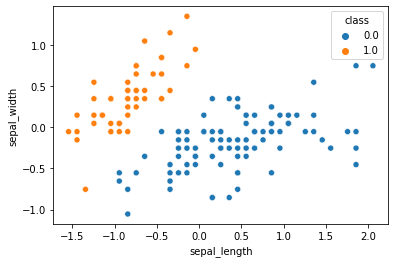

In [264]:
mean = np.average(np.array(df_setosa_mini)[:,0:2], axis=0)

df_setosa_mini_centered = df_setosa_mini - np.append(mean, 0)
sns.scatterplot(data=df_setosa_mini_centered, x="sepal_length", y="sepal_width", hue="class")

## Setosa classification

In [265]:
y = df_setosa_mini_centered['class']
X = df_setosa_mini_centered.loc[:, df_setosa_mini_centered.columns != 'class']

In [266]:
def min_accuracy(X, y, *, n_epoch=10, theta=4):    
    accuracies = []
    for i in range(n_epoch):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        clf = Perzeptron(theta=theta)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return min(accuracies)

In [267]:
min_accuracy(X, y, theta=.5)

0.74

**After centralizing the data and calculating the resulting accuracy of our classification we get promising results. We can distinguish Setosa from Versicolour and Virginica.**

## Separation Versicolour from Virginica

In [268]:
df_not_setosa = df.copy()
df_not_setosa = df_not_setosa[df_not_setosa['class'] != 'Iris-setosa']
df_not_setosa['class'] = df_not_setosa['class'].apply(lambda c: 1 if c == 'Iris-versicolor' else 0)

In [269]:
df_not_setosa_mini = df_not_setosa[['petal_length', 'petal_width', 'class']].copy()
mean = np.average(np.array(df_not_setosa_mini)[:,0:2], axis=0)

y = df_not_setosa_mini['class']
X = df_not_setosa_mini.loc[:, df_not_setosa_mini.columns != 'class']

min_accuracy(X, y)

0.42424242424242425

**As we can see the accuracy is pretty low. It can be explained by the fact that these features are not linearly separable. Let's see if we can find a couple of features which do not overlap much.**

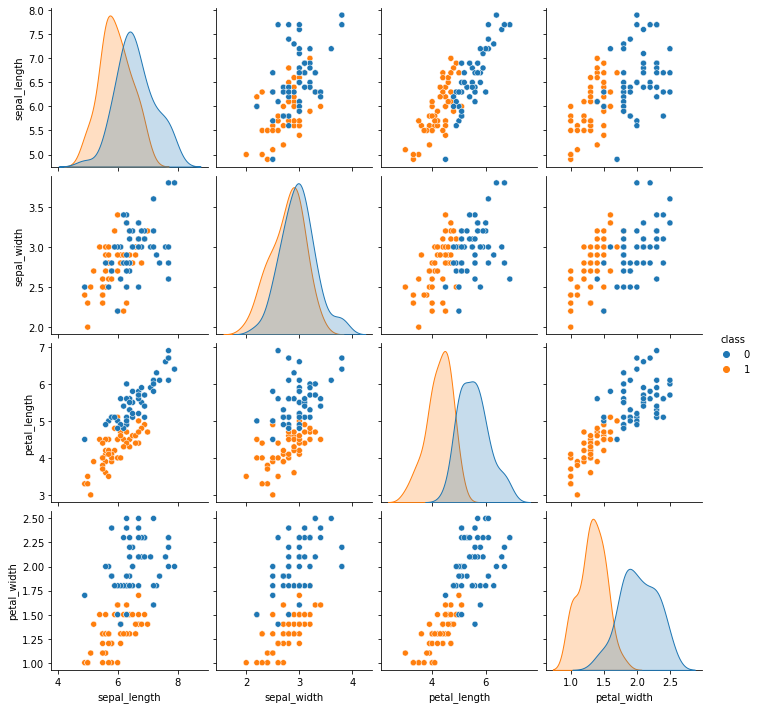

In [270]:
sns.pairplot(df_not_setosa, hue='class')

In [271]:
df_not_setosa_mini = df_not_setosa[['petal_length', 'petal_width', 'class']].copy()
mean = np.average(np.array(df_not_setosa_mini)[:,0:2], axis=0)

df_not_setosa_mini_centered = df_not_setosa_mini - np.append(mean, 0)
y = df_not_setosa_mini_centered['class']
X = df_not_setosa_mini_centered.loc[:, df_not_setosa_mini_centered.columns != 'class']
min_accuracy(X, y)

0.9090909090909091

**Now we solved this issue.**

# MLP

Implement a class that builds an MLP with both variable depth D (number of layers) and
variable number of neurons n_i

for each layer i = 1, ..., D. Produce outputs on the ZIP Dataset

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Imports

In [273]:
#import data
zip_train = "zip.train"
zip_test = "zip.test"
df_zip_train = pd.read_csv('zip/'+zip_train, sep=' ',header=None)
df_zip_train = df_zip_train[df_zip_train.columns[:-1]]

y_zip = df_zip_train[df_zip_train.columns[0]]
X_zip = df_zip_train[df_zip_train.columns[1:]]

df_zip_test = pd.read_csv('zip/'+zip_test, sep=' ',header=None)
df_zip_test = df_zip_test[df_zip_test.columns[:-1]]


## Data Exploration

In [274]:
def plotNum(num):
    fig, ax = plt.subplots()
    min_val, max_val = -1, 1
    intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
    ax.matshow(num, cmap=plt.cm.Blues)
    plt.show()

Let's inspect the training data

6.0


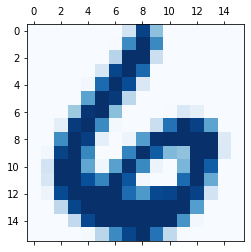

5.0


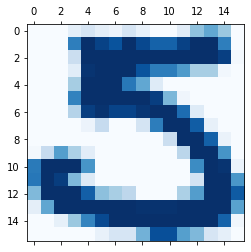

4.0


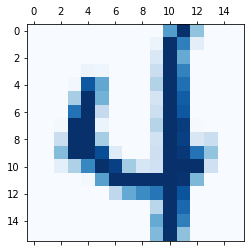

7.0


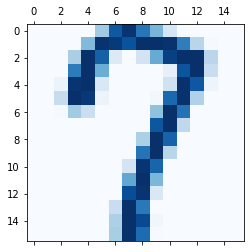

3.0


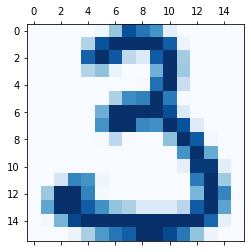

6.0


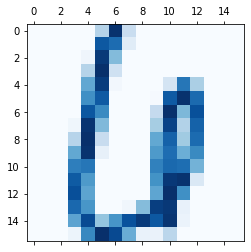

3.0


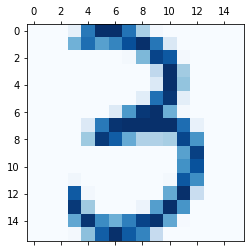

1.0


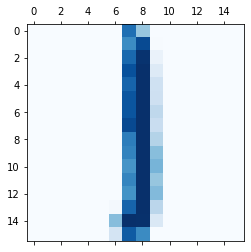

0.0


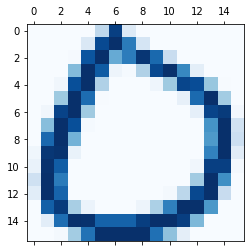

1.0


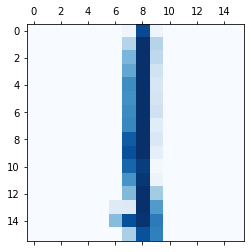

7.0


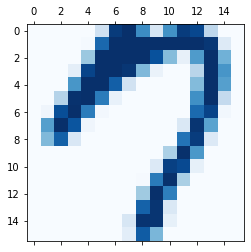

0.0


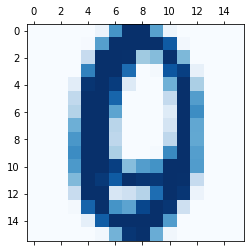

1.0


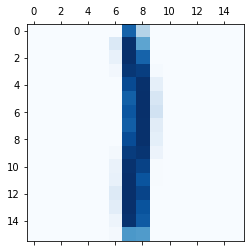

1.0


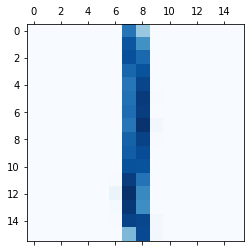

7.0


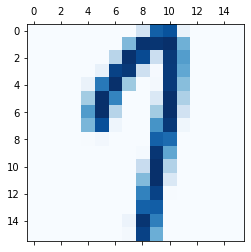

7.0


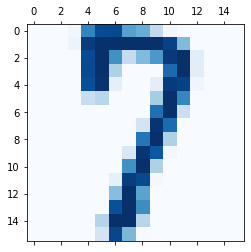

4.0


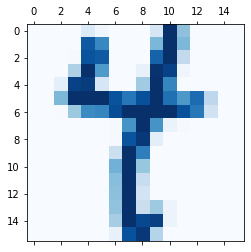

8.0


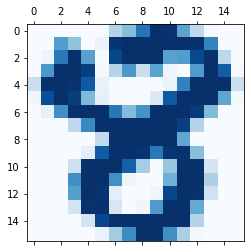

0.0


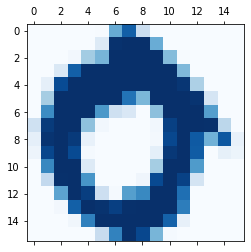

1.0


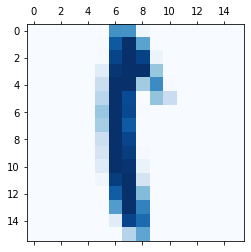

In [275]:
for i in range(20):
    print(df_zip_train.iloc[i][0])
    plotNum(df_zip_train.iloc[i][1:].to_numpy().reshape([16,16]))

## MLP Implementation

In [276]:
class Dense():
    def __init__(self, input_units, output_units, theta=1):
        self.theta = theta
        self.weights = np.random.randint(2, size = (input_units,output_units))
        self.biases = np.zeros(output_units)

    def fit(self, X, y):
        Xy = self._merge(X, y)
        self.weights = self._get_w(Xy)
    
    def _get_w(self, Xy):
        dist = np.inf
        P = Xy[((Xy[:, 2] > 0))]
        w_ = np.average(P, axis=0)[:-1]
        w = w_
        while dist > self.theta:
            w = w_
            v_ = random_sample(Xy).reshape(3, )            
            v = v_[:-1]
            v_is_p = v_[-1]
            dot = np.dot(w, v)

            if v_is_p and dot > 0:
                continue
            elif v_is_p and dot <= 0:
                w_ = w + v
            elif not v_is_p and dot < 0:
                continue
            else:
                w_ = w - v

            dist = np.linalg.norm(w_ - w) 
        return w
        
    def forward(self,input):
        return np.dot(input,self.weights) + self.biases

class MLP():
    def __init__(self, depth, neurons, thetas):
        self.network = []
        for i in range(depth):
            self.network.append(Dense(neurons[i][0],neurons[i][1], thetas[i]))

    def forward(self, X):
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            activations.append(l.forward(input))
            # Updating input to last layer output
            input = activations[-1]
        assert len(activations) == len(network)
        return activations

    def predict(self,X):
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X_zip.to_numpy(), y_zip.to_numpy(), test_size=0.2, random_state=42)

In [281]:
neurons=[[X_train.shape[1],100],[100,200],[200,10]]

mlp = MLP(depth=3, neurons=neurons, thetas = [1,1,1])
mlp.predict(X_train)

array([4, 4, 4, ..., 4, 4, 4])